# Principle Component Analysis (PCA)
Author: Magdalena Whelley

This notebook performs PCA using the custom implementation from  
`rice_ml.pca.PCA` on a real ecological dataset involving penguins from the Palmer Archipelago.


The dataset includes biometric measurements for three penguin species:
- Adelie
- Gentoo
- Chinstrap

In it, we will:
1. Load the dataset from an online CSV
2. Clean numerical features
3. Fit PCA
4. Visualize the first two principal components

In [5]:
# 1. Imports and Load Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rice_ml.pca import PCA

# URL
url = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

df = pd.read_csv(url)
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## 2. Dataset Description

Features include:
- Bill length (mm)
- Bill depth (mm)
- Flipper length (mm)
- Body mass (g)
- Species label (categorical)

We will use only numeric features for PCA.

The dataset includes **344 samples** across **three penguin species** (*Adélie*, *Chinstrap*,
and *Gentoo*), with numerical features such as bill length, bill depth, flipper length, and
body mass.

The dataset is commonly used for **classification and exploratory data analysis**. Some
entries contain missing values, which are handled during preprocessing prior to model
training.


In [6]:
# 4. Preprocessing
# Drop rows with missing values
df_clean = df.dropna()

# Select numeric morphological features
numeric_cols = ["bill_length_mm", "bill_depth_mm",
                "flipper_length_mm", "body_mass_g"]

X = df_clean[numeric_cols].values

# For coloring (used later)
species = df_clean["species"].values

X[:5]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ]])

In [7]:
# 5. Fit PCA using src implementation
pca = PCA(n_components=2)
pca.fit(X)

print("Explained variance:", pca.explained_variance_)
print("Components:\n", pca.components_)

Explained variance: [6.48533462e+05 5.07358125e+01]
Components:
 [[ 0.00400316 -0.00115433  0.01519455  0.99987588]
 [-0.31927773  0.08684753 -0.94354238  0.01571702]]


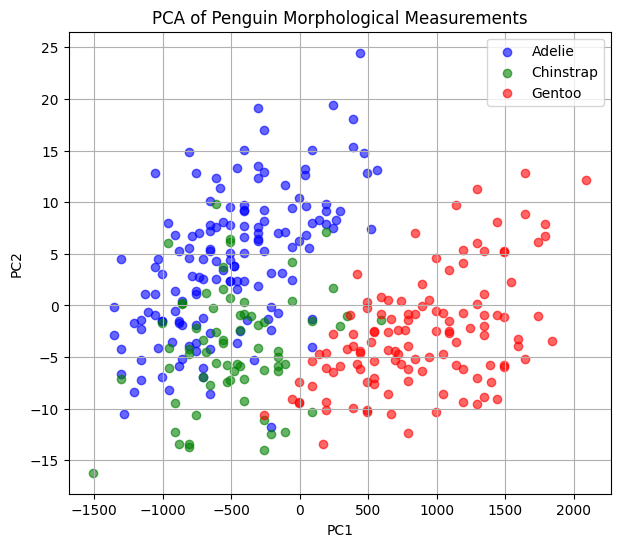

In [8]:
# 6. Visualization
X_proj = pca.transform(X)

species_unique = np.unique(species)
colors = {"Adelie": "blue", "Chinstrap": "green", "Gentoo": "red"}

plt.figure(figsize=(7,6))
for sp in species_unique:
    mask = species == sp
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1],
                label=sp, alpha=0.6, color=colors[sp])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Penguin Morphological Measurements")
plt.legend()
plt.grid(True)
plt.show()


## 7. Interpretation

The goal of performing PCA on the penguin morphological measurements is to identify the dominant patterns of variation in the dataset and to determine whether species differ systematically along these principal axes. Because PCA finds orthogonal directions in feature space that maximize variance, each principal component reflects a different biologically meaningful pattern in the measurements.

1. **PC1 represents overall body size:** The first principal component explains the largest portion of variance and strongly separates Gentoo penguins (right side of the plot) from both Adelie and Chinstrap penguins (left and center). This component is dominated by features such as body mass and flipper length, which have the largest numerical variance.

Gentoo penguins are substantially larger in mass and flipper length, so their projections along PC1 are the most positive. Adelie penguins are the smallest morphologically, giving them strongly negative PC1 values, while Chinstrap penguins fall between the two groups.

Thus, PC1 acts as a size axis, capturing variation in overall body magnitude across the species.

2. **PC2 captures differences in body proportions**: The second principal component, orthogonal to PC1, reflects a different pattern of variation: one driven more by relative shape differences, particularly in bill depth versus bill length and other proportional features.

Adelie penguins show the widest spread along PC2, suggesting substantial variation in bill morphology within the species. Gentoos exhibit a tighter cluster, consistent with their more uniform proportional shape. Chinstrap penguins again occupy an intermediate region.

PC2 can therefore be interpreted as a shape or proportionality axis, distinguishing penguins not by overall size but by morphological ratios.

3. **Species form distinct and meaningful clusters**: The PCA projection reveals well-separated grouping structures:
- Gentoo penguins cluster far to the right (large PC1), indicating consistently larger body size.
- Adelie penguins cluster on the left (small PC1), showing smaller size and broader variation in PC2 (shape).
- Chinstrap penguins lie between the two, reflecting intermediate traits.

Even though PCA is an unsupervised method, the species labels align cleanly with the major dimensions of variance. This demonstrates that the primary differences between the species are fundamentally morphological, and that PCA recovers this structure without any label information.